# WORK IN PROGRESS 

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
from numpy import arange
import wikipedia

In [2]:
import bs4
from bs4 import BeautifulSoup
import requests
import urllib
import urllib.request
from urllib.request import urlretrieve 
from urllib.request import urlopen, Request
import re

In [3]:
import random
import time

Part 1 
The first part doesn't differ much to other notebook on the matter you can find on the internet. It's a brief and simple attempt at answering the question: Does Fandango still inflate the ratings?

Part 2 
**This is where things get interesting**. Having done the basic analysis on part 1, I came to conclusion that we need more data! My theory is not groundbreaking but I'will prove it: money is a very important factor in Fandango rating, not only the amout of money involved in the movie but also where is it coming from.
* scraped Wikipedia pages of each movie for budget data and for Distribution company data
* analyzed the ratings based on new data

In [4]:
fandango = pd.read_csv('fandango_score.csv')
movies = pd.read_csv('movie_ratings_16_17.csv')
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
fandango.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [6]:
movies.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
fand = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes']].copy()

mov = movies[['movie', 'year', 'fandango', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']].copy()
mov.head()

,movie,year,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,3.5,4.0,3.5,4.5,4.0
1,13 Hours,2016,4.5,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,3.0,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,4.5,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,3.0,3.0,3.0,3.5,3.0


Initial observations
small dataset
various rating sites


# Assigning only 1 year per dataframe

In [8]:
fand['year'] = fand['FILM'].str[-5:-1].astype(int)

In [9]:
fand['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [10]:
fand_15 = fand[fand['year']==2015].copy()
fand_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,4.5,4.0,3.5,4.0,3.5,249,65709,12640,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,4.0,4.5,3.0,4.0,4.0,627,103660,12055,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,1.0,4.0,1.0,2.5,2.5,31,3136,1793,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,0.5,1.5,1.5,1.5,2.5,88,19560,1021,2015


In [11]:
fand_15.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'year'],
      dtype='object')

In [12]:
mov_16 = mov[mov['year'] == 2016].copy()

# Comparing rating distribution in 2015 and 2016

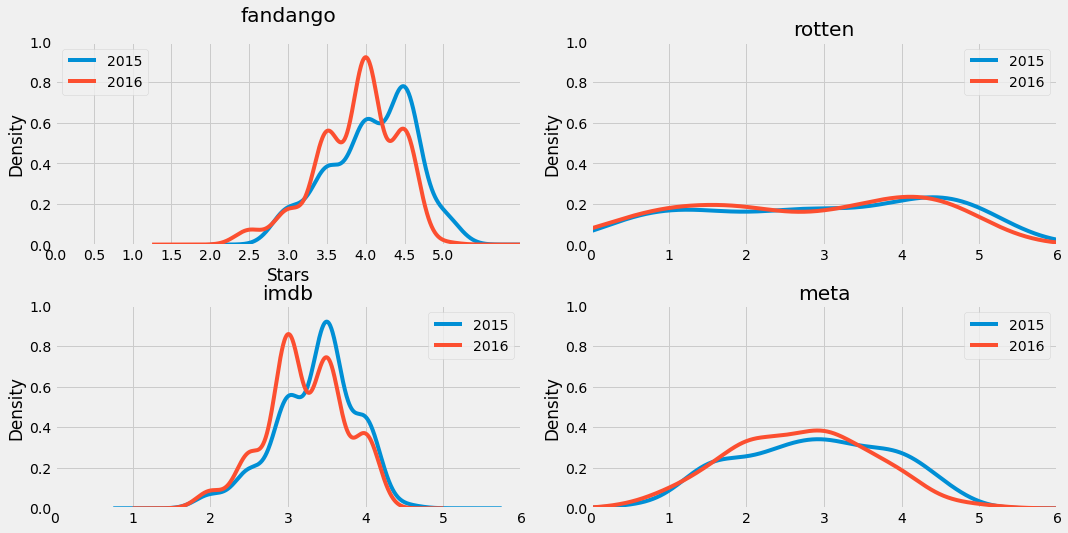

In [13]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(2,2,figsize=(16, 14))
ax1 = plt.subplot(221)

fand_15['Fandango_Stars'].plot.kde(label = '2015', legend = True)
mov_16['fandango'].plot.kde(label = '2016', legend = True)
plt.title("fandango",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.legend(loc=2)
ax2 = plt.subplot(222)
fand_15['RT_norm_round'].plot.kde(label = '2015', legend = True, figsize = (16,8))
mov_16['nr_tmeter'].plot.kde(label = '2016', legend = True)
plt.title('rotten')

ax3 = plt.subplot(223)
fand_15['IMDB_norm_round'].plot.kde(label = '2015', legend = True, figsize = (16,8))
mov_16['nr_imdb'].plot.kde(label = '2016', legend = True)
plt.title('imdb')
ax4 = plt.subplot(224)
fand_15['Metacritic_norm_round'].plot.kde(label = '2015', legend = True, figsize = (16,8))
mov_16['nr_metascore'].plot.kde(label = '2016', legend = True)
plt.title('meta')
axes=[ax1,ax2,ax3,ax4]
for ax in axes:
     ax.set_ylim(0,1)
     ax.set_xlim(0,6)

fig.subplots_adjust(hspace=0.3, wspace=0.15)
plt.show()

# write Observations

In [14]:
mean_15 = fand_15['Fandango_Stars'].mean()
mean_16 = mov_16['fandango'].mean()
median_15 = fand_15['Fandango_Stars'].median()
median_16 = mov_16['fandango'].median()
mode_15 = fand_15['Fandango_Stars'].mode()[0]
mode_16 = mov_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


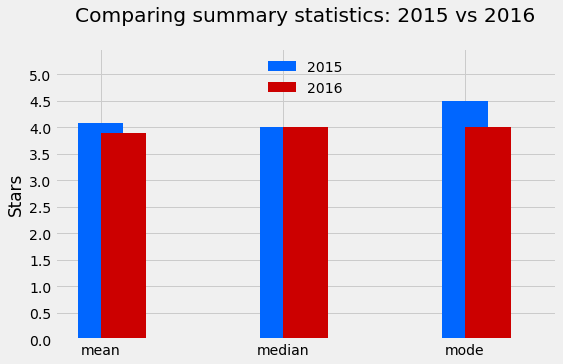

In [15]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

# write stuff here bout part and part 2

In [17]:
def scrape_distribute(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(4,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Distributed by':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [18]:
def scrape_money(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(8,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Budget':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [19]:
movies['title_urled'] = movies['movie'].str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_').str.lower()
movies['title_urled'] = movies['title_urled'] +'_'+ movies['year'].astype(str)
movies['distributor'] = movies.apply(scrape_distribute, axis=1)

In [218]:
fand['title_urled'] = fand['FILM'].str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_').str.lower()
# fand['title_urled'] = fand['title_urled']
fand['distributor'] = fand.apply(scrape_distribute, axis=1)

In [247]:
def scrape_money(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(1,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Budget':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [252]:
def scrape_money2(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[11].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(1,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Budget':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [26]:
movies['test'] = movies.apply(scrape_money, axis=1)

In [219]:
fand['test'] = fand.apply(scrape_money, axis=1)

In [286]:
fand.loc[fand['test'].isnull(), 'test'] = fand[fand['test'].isnull()].apply(scrape_money2, axis=1)

In [287]:
movies.loc[movies['test'].isnull(), 'test'] =  movies[movies['test'].isnull()].apply(scrape_money2, axis=1)

In [210]:
# copy_movies = movies.copy()
# copy_fand = fand.copy()

In [96]:
# movies['distributor'] = copy_movies['distributor']
# fand['distributor'] = copy_fand['distributor']

# movies['test'] = copy_movies['test']
# fand['test'] = copy_fand['test']


# really need to fix this crap:

In [288]:
# regex magic to clean the budget data: 
patt = r"\[\d\]"
# movies['test'] = movies_safe_copy['test']
# movies['test0'] = movies_safe_copy['test']
movies['is_it_mill'] = movies['test'].str.contains("million")
movies['currency'] = movies['test'].str.extract("([^\w])")
movies['test2']= movies['test'].str.replace(patt, "", regex=True)
movies['test2'] = movies['test2'].str.replace('[$£€¥]', "", regex=True)
movies['test2'] = movies['test2'].str.replace('[a-z]', "", regex=True)
movies['test2'] = movies['test2'].str.replace('[a-z]', "", regex=True)
movies['test2'] = movies['test2'].str.split(pat='[-–]')
movies['low_end'] = movies['test2'].str[0]
movies['low_end'] = movies['low_end'].str.replace('[^\d.-–]', "", regex=True)
movies['low_end'] = movies['low_end'].str.replace('[^\d.]',"", regex=True)
movies['low_end'] = movies['low_end'].astype(float)
# movies[movies['low_end']>500]
movies.loc[23 ,'low_end'] = 21
movies.loc[41 ,'low_end'] = 156
movies.loc[97 ,'low_end'] = 90
movies.loc[211 ,'low_end'] = 215/3
movies.loc[movies['is_it_mill'] == False, 'is_it_mill'] = True

In [289]:
# regex magic to clean the budget data: 
# fand['test'] = fand_safe_copy['test']
fand['test2']= fand['test'].str.replace(patt, "", regex=True)
fand['is_it_mill'] = fand['test2'].str.contains("million")
fand['currency'] = fand['test'].str.extract("([^\w])")
fand['test2']= fand['test2'].str.replace(patt, "", regex=True)
fand['test2'] = fand['test2'].str.replace('[$£€¥]', "", regex=True)
fand['test2'] = fand['test2'].str.replace('[a-z]', "", regex=True)
fand['test2'] = fand['test2'].str.split(pat='[-–]')
fand['low_end'] = fand['test2'].str[0]
fand['low_end'] = fand['low_end'].str.replace('[^\d.-–]', "", regex=True)
fand.loc[12 ,'currency'] = '$'
fand.loc[109 ,'currency'] = '$'
fand.loc[12 ,'low_end'] = 7
fand.loc[109 ,'low_end'] = 9.6
fand.loc[31 ,'low_end'] = 10.5
fand.loc[91 ,'low_end'] = 38.5
fand['low_end'] = fand['low_end'].str.replace('[^\d.]',"", regex=True)
fand['low_end'] = fand['low_end'].astype(float)
fand.loc[fand['is_it_mill'] == False, 'low_end'] = 0.1

In [290]:
fand['distributor']= fand['distributor'].str.replace(patt, ",", regex=True)
movies['distributor']= movies['distributor'].str.replace(patt, ",", regex=True)

In [291]:
fand['year'] = fand['FILM'].str[-5:-1].astype(int)
fanda_15 = fand[fand['year']==2015].copy()
mova_16 = movies[movies['year'] == 2016].copy()

In [164]:
# top15_distributors = movies['distributor'].value_counts()[:15].index.tolist()
# top15df = movies[movies['distributor'].isin(top15_distributors)]
# top15df.groupby('distributor')['low_end'].mean().sort_values(ascending=False)
# top15 = top15df.groupby('distributor')['low_end'].sum().sort_values(ascending=False).to_frame()

In [292]:
fanda_15['distributor']= fanda_15['distributor'].str.replace(patt, " ,", regex=True)
fanda_15['distributor']= fanda_15['distributor'].str.replace('\n', " ,", regex=True)
fanda_15['distributor']= fanda_15['distributor'].str.replace('\(\w+\)', ",", regex=True)
fanda_15['distributor']= fanda_15['distributor'].str.replace('\(\w+\s\w+\)', "", regex=True)
fanda_15.loc[fanda_15['distributor'].str.find('Disney') != -1, 'distributor'] = 'Walt Disney Studios Motion Pictures'
fanda_15.loc[[33,130], 'distributor'] = 'Universal Pictures'
fanda_15.loc[fanda_15['distributor'].str.find('Sony Pictures Classics') != -1, 'distributor'] = 'Sony Pictures Releasing'

mova_16['distributor']= mova_16['distributor'].str.replace(patt, " ,", regex=True)
mova_16['distributor']= mova_16['distributor'].str.replace('\n', " ,", regex=True)
mova_16['distributor']= mova_16['distributor'].str.replace('\(\w+\)', ",", regex=True)
mova_16['distributor']= mova_16['distributor'].str.replace('\(\w+\s\w+\)', "", regex=True)
mova_16['distributor'].value_counts().sort_index()
mova_16.loc[mova_16['distributor'].str.find('Walt Disney StudiosMotion Pictures') != -1, 'distributor'] = 'Walt Disney Studios Motion Pictures'
mova_16.loc[mova_16['distributor'].str.find('Warner Bros. Pictures ,') != -1, 'distributor'] = 'Warner Bros. Pictures'
mova_16.loc[mova_16['distributor'].str.find('Lionsgate Premiere') != -1, 'distributor'] = 'Lionsgate'
mova_16.loc[mova_16['distributor'].str.find('Lionsgate,') != -1, 'distributor'] = 'Lionsgate'



In [304]:
####### IMPORTANT!!! 
fanda_15.loc[77, 'low_end'] = 31

In [303]:
fanda_15.loc[77, 'low_end']

5113.0

In [293]:
fanda_15['distributor']= fanda_15['distributor'].str.replace(' , ,', " ,", regex=True)

In [126]:
# fanda_15.loc[[33,130], 'distributor'] = 'Universal Pictures'

In [294]:
fanda_15 = fanda_15.loc[:,~fanda_15.columns.duplicated()].copy()

In [256]:
mova_16.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience', 'title_urled', 'distributor',
       'test', 'is_it_mill', 'currency', 'test2', 'low_end'],
      dtype='object')

In [264]:
nulls16 = mova_16[mova_16['test'].isnull()].copy()
nulls16['test'] = nulls16.apply(scrape_money2, axis=1)

In [275]:
fanda_15.loc[fanda_15['test'].isnull(), 'test'] = fanda_15[fanda_15['test'].isnull()].apply(scrape_money2, axis=1)

In [269]:
mova_16.loc[mova_16['test'].isnull(), 'test'] =  mova_16[mova_16['test'].isnull()].apply(scrape_money2, axis=1)

In [295]:
mova_16[mova_16['test'].isnull()].shape

(31, 22)

In [296]:
fanda_15[fanda_15['test'].isnull()].shape

(19, 20)

In [238]:
nulls15 = fanda_15[fanda_15['test'].isnull()].sort_values('IMDB_user_vote_count', ascending=False).copy()

In [253]:
nulls15['test'] = nulls15.apply(scrape_money2, axis=1)

4722.26

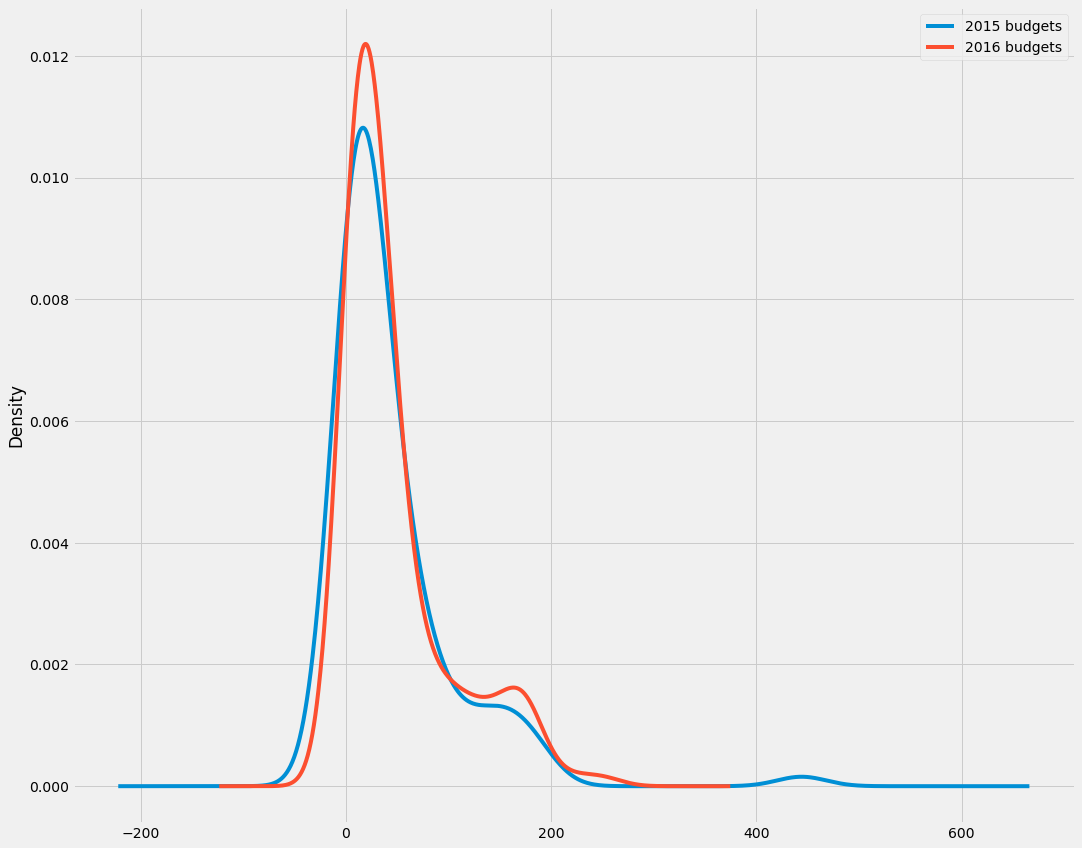

In [305]:
fig, axes = plt.subplots(figsize=(16, 14))
fanda_15['low_end'].plot.kde(label = '2015 budgets', legend = True)
mova_16['low_end'].plot.kde(label = '2016 budgets', legend = True)
fanda_15['low_end'].sum()

In [306]:
mova_16['low_end'].mean()

47.770624999999995

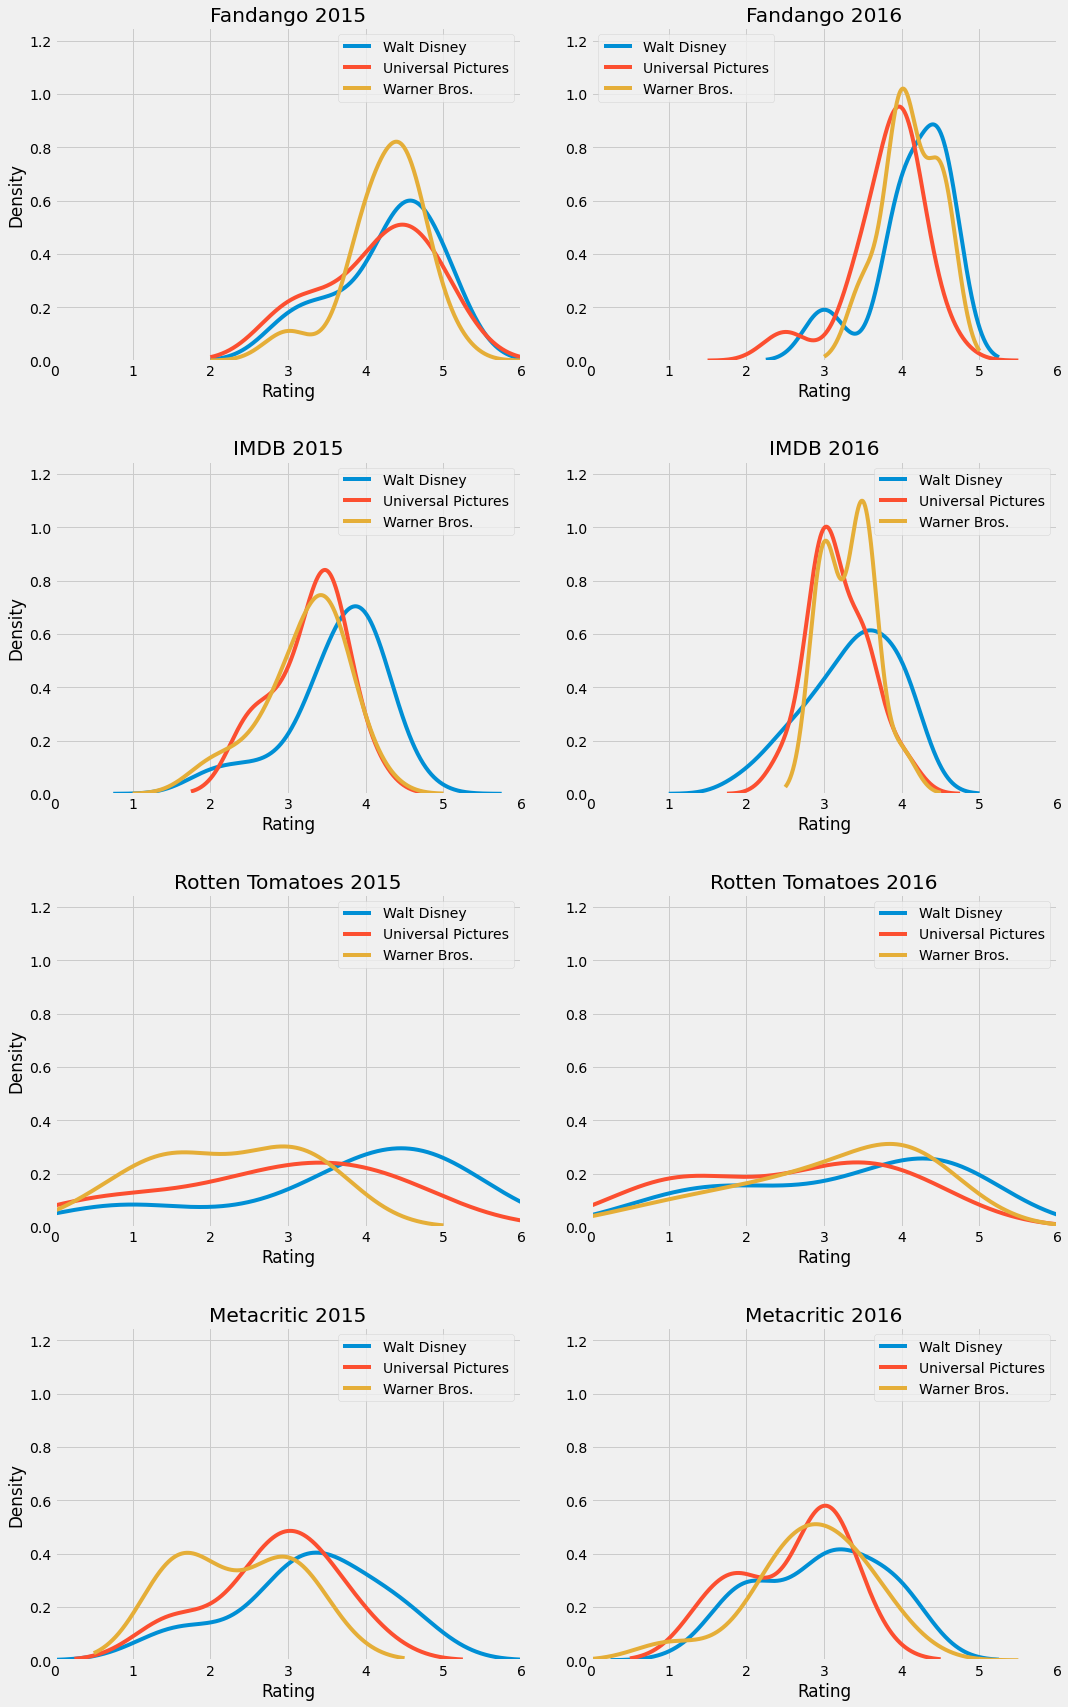

In [307]:
waltdf15 = fanda_15[fanda_15['distributor']=='Walt Disney Studios Motion Pictures']
univ15 = fanda_15[fanda_15['distributor']=='Universal Pictures']
warner15 = fanda_15[fanda_15['distributor']=='Warner Bros. Pictures']
waltdf16 = mova_16[mova_16['distributor']=='Walt Disney Studios Motion Pictures']
univ16 = mova_16[mova_16['distributor']=='Universal Pictures']
warner16 = mova_16[mova_16['distributor']=='Warner Bros. Pictures']

plt.style.use('fivethirtyeight')
def three_plots_15(col_name):
    x1 = waltdf15[col_name].plot.kde(label = 'Walt Disney', legend = True)
    x2 = univ15[col_name].plot.kde(label = 'Universal Pictures', legend = True)
    x3 = warner15[col_name].plot.kde(label = 'Warner Bros.', legend = True)
    return x1, x2, x3
def three_plots_16(col_name):
    x1 = waltdf16[col_name].plot.kde(label = 'Walt Disney', legend = True)
    x2 = univ16[col_name].plot.kde(label = 'Universal Pictures', legend = True)
    x3 = warner16[col_name].plot.kde(label = 'Warner Bros.', legend = True)
    return x1, x2, x3

fig, axes = plt.subplots(2,2,figsize=(16, 28))
fig.subplots_adjust(hspace=0.3, wspace=0.15)
ax1 = plt.subplot(421)
three_plots_15('Fandango_Stars')
ax2 = plt.subplot(422)
three_plots_16('fandango')
ax3 = plt.subplot(423)
three_plots_15('IMDB_norm_round')
ax4 = plt.subplot(424)
three_plots_16('nr_imdb')
ax5 = plt.subplot(425)
three_plots_15('RT_norm_round')
ax6 = plt.subplot(426)
three_plots_16('nr_tmeter')
ax7 = plt.subplot(427)
three_plots_15('Metacritic_norm_round')
ax8 = plt.subplot(428)
three_plots_16('nr_metascore')
titles = ['Fandango 2015', 'Fandango 2016','IMDB 2015', 'IMDB 2016', 'Rotten Tomatoes 2015', 
          'Rotten Tomatoes 2016', 'Metacritic 2015', 'Metacritic 2016']
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for n in list(range(0,8)):
    axes[n].set_ylim(0,1.25)
    axes[n].set_xlim(0,6)
    axes[n].set_title(titles[n])
    axes[n].set_xlabel('Rating')
right_axes=[ax2,ax4,ax6,ax8]  
for ax in right_axes:
    ax.set_ylabel('',visible=False)

plt.show()

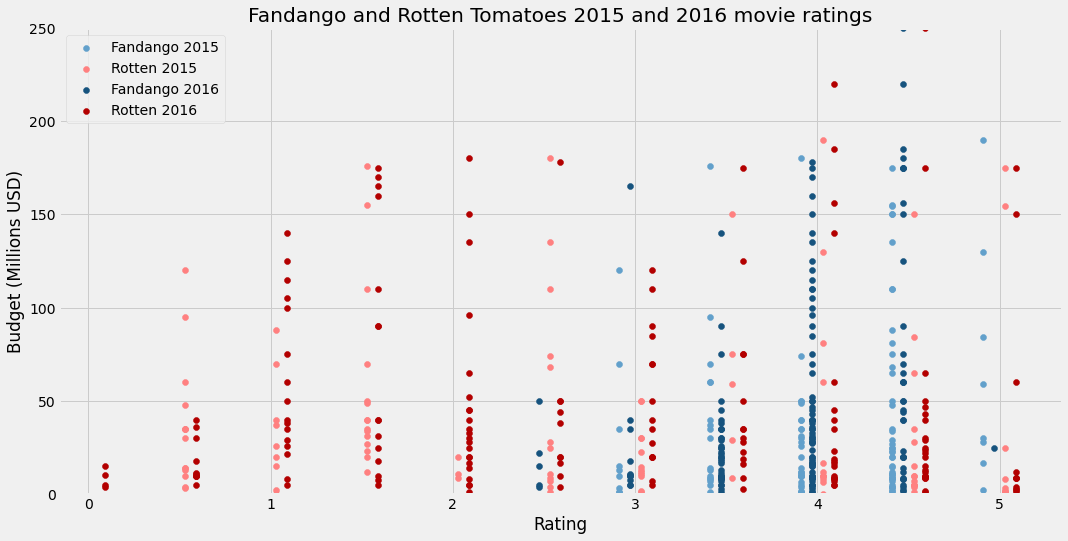

In [308]:
fig, ax = plt.subplots(figsize=(16,8))
fanda_15['forplot1'] = fanda_15['Fandango_Stars'] - 0.09
mova_16['forplot1'] = mova_16['fandango'] - 0.03
fanda_15['forplot2'] = fanda_15['RT_norm_round'] + 0.03
mova_16['forplot2'] = mova_16['nr_tmeter'] + 0.09

plt.scatter(data=fanda_15, y='low_end', x='forplot1', label='Fandango 2015', c='#62a0cb')
plt.scatter(data=fanda_15, y='low_end', x='forplot2', label='Rotten 2015' ,c ='#ff8080')
plt.scatter(data=mova_16, y='low_end', x='forplot1', label='Fandango 2016', c='#16537e')
plt.scatter(data=mova_16, y='low_end', x='forplot2', label='Rotten 2016',c ='#b30000' )

plt.ylim(0,250)
plt.ylabel('Budget (Millions USD)')
plt.xlabel('Rating')
plt.legend(loc=2)
plt.title('Fandango and Rotten Tomatoes 2015 and 2016 movie ratings')
fanda_15 = fanda_15.drop(['forplot1', 'forplot2'], axis=1)
mova_16 = mova_16.drop(['forplot1', 'forplot2'], axis=1)
plt.show()

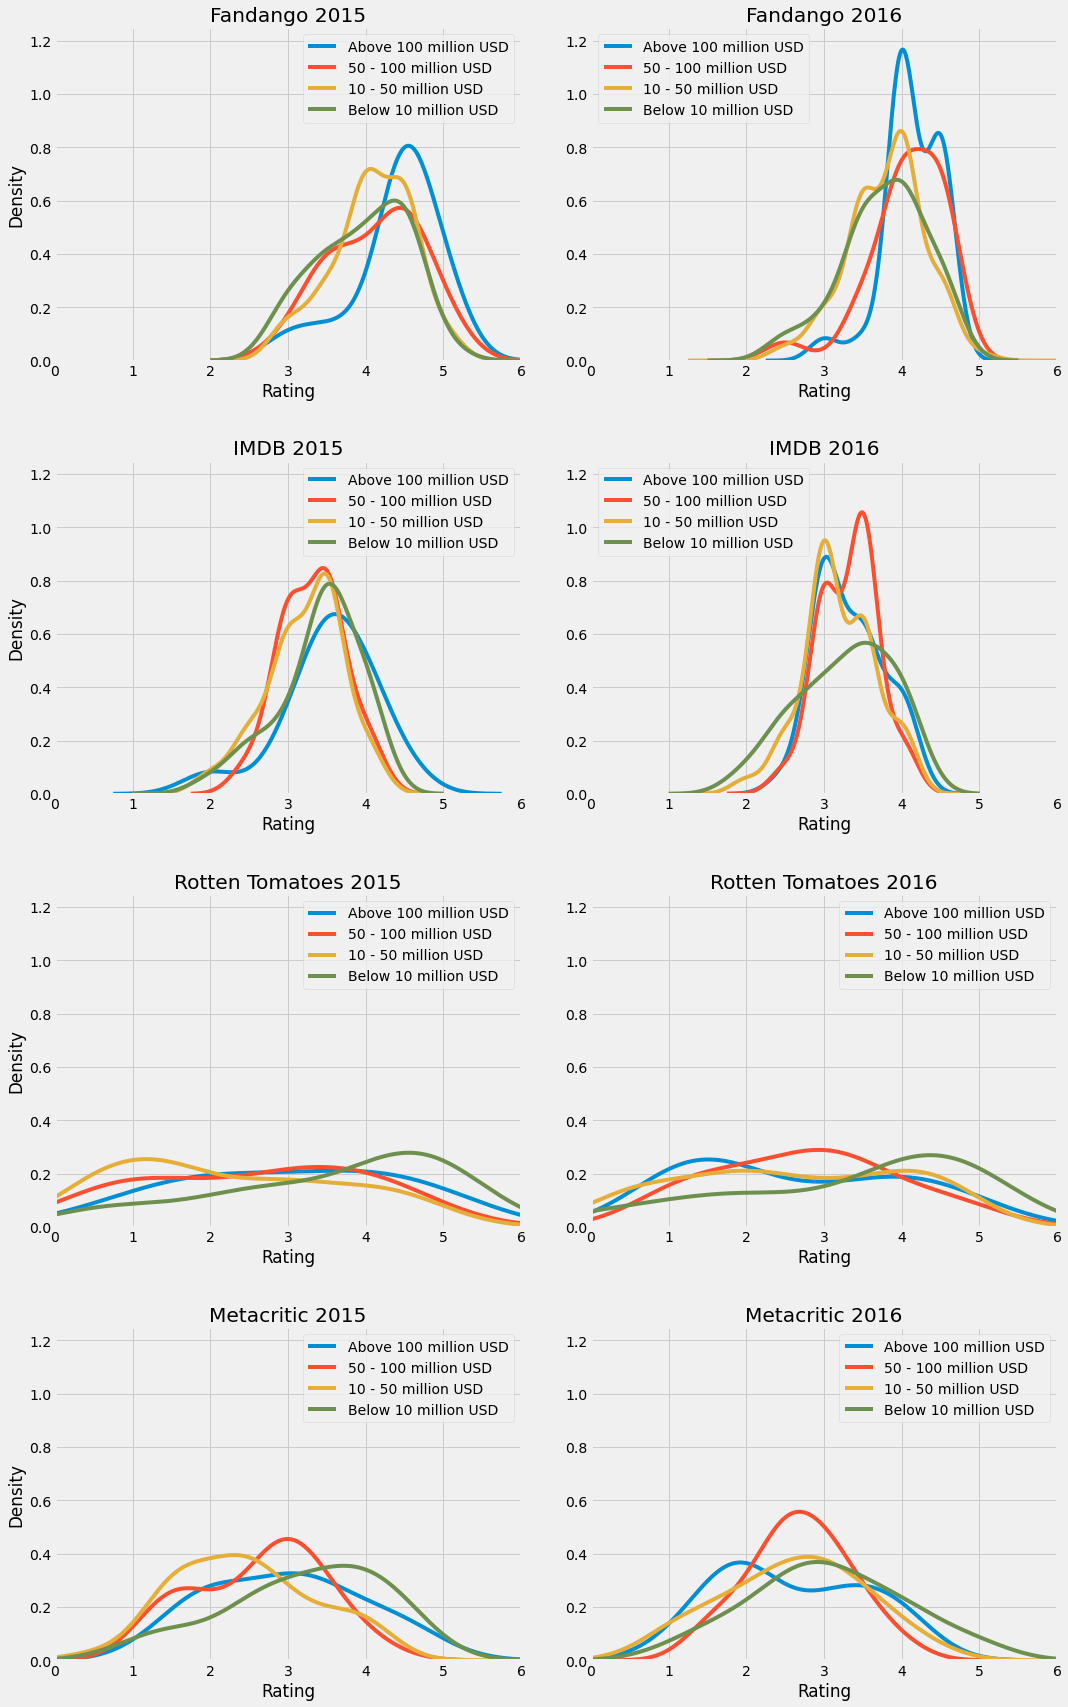

In [309]:
fanda_15_100 = fanda_15[fanda_15['low_end']>=100]
fanda_15_50 = fanda_15[(fanda_15['low_end']>=50) & (fanda_15['low_end']<100)]
fanda_15_10 = fanda_15[(fanda_15['low_end']>=10) & (fanda_15['low_end']<50)]
fanda_15_0 = fanda_15[fanda_15['low_end']<10]

mov16_100 = mova_16[mova_16['low_end']>=100]
mov16_50 = mova_16[(mova_16['low_end']>=50) & (mova_16['low_end']<100)]
mov16_10 = mova_16[(mova_16['low_end']>=10) & (mova_16['low_end']<50)]
mov16_0 = mova_16[mova_16['low_end']<10]

plt.style.use('fivethirtyeight')
def four_plots_15(col_name):
    x1 = fanda_15_100[col_name].plot.kde(label = 'Above 100 million USD', legend = True)
    x2 = fanda_15_50[col_name].plot.kde(label = '50 - 100 million USD', legend = True)
    x3 = fanda_15_10[col_name].plot.kde(label = '10 - 50 million USD', legend = True)
    x4 = fanda_15_0[col_name].plot.kde(label = 'Below 10 million USD', legend = True)
    return x1, x2, x3, x4
def four_plots_16(col_name):
    x1 = mov16_100[col_name].plot.kde(label = 'Above 100 million USD', legend = True)
    x2 = mov16_50[col_name].plot.kde(label = '50 - 100 million USD', legend = True)
    x3 = mov16_10[col_name].plot.kde(label = '10 - 50 million USD', legend = True)
    x4 = mov16_0[col_name].plot.kde(label = 'Below 10 million USD', legend = True)
    return x1, x2, x3, x4

fig, axes = plt.subplots(2,2,figsize=(16, 28))
fig.subplots_adjust(hspace=0.3, wspace=0.15)
ax1 = plt.subplot(421)
four_plots_15('Fandango_Stars')
ax2 = plt.subplot(422)
four_plots_16('fandango')
ax3 = plt.subplot(423)
four_plots_15('IMDB_norm_round')
ax4 = plt.subplot(424)
four_plots_16('nr_imdb')
ax5 = plt.subplot(425)
four_plots_15('RT_norm_round')
ax6 = plt.subplot(426)
four_plots_16('nr_tmeter')
ax7 = plt.subplot(427)
four_plots_15('Metacritic_norm_round')
ax8 = plt.subplot(428)
four_plots_16('nr_metascore')
titles = ['Fandango 2015', 'Fandango 2016','IMDB 2015', 'IMDB 2016', 'Rotten Tomatoes 2015', 
          'Rotten Tomatoes 2016', 'Metacritic 2015', 'Metacritic 2016']
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for n in list(range(0,8)):
    axes[n].set_ylim(0,1.25)
    axes[n].set_xlim(0,6)
    axes[n].set_title(titles[n])
    axes[n].set_xlabel('Rating')

right_axes=[ax2,ax4,ax6,ax8]  
for ax in right_axes:
    ax.set_ylabel('',visible=False)

plt.show()

In [310]:
di16 = mova_16.distributor.value_counts()[:10].index.tolist()
di15 = fanda_15.distributor.value_counts()[:10].index.tolist()
di_ratings16 = mova_16[mova_16['distributor'].isin(di16)].groupby('distributor')['fandango'].mean().sort_values(ascending=False).to_frame()
di_budget16 = mova_16[mova_16['distributor'].isin(di16)].groupby('distributor')['low_end'].sum().sort_values(ascending=False).to_frame()
budget_rating16 = di_ratings16.merge(di_budget16, left_index=True, right_index=True)
di_budget15 = fanda_15[fanda_15['distributor'].isin(di16)].groupby('distributor')['low_end'].sum().sort_values(ascending=False).to_frame()
di_ratings15 = fanda_15[fanda_15['distributor'].isin(di16)].groupby('distributor')['Fandango_Stars'].mean().sort_values(ascending=False).to_frame()
budget_rating15 = di_ratings15.merge(di_budget15, left_index=True, right_index=True)

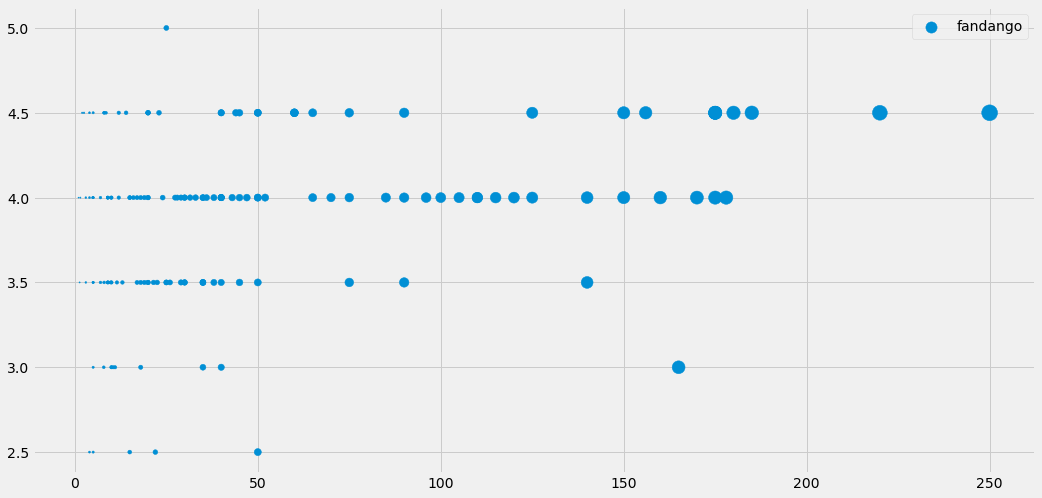

In [199]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=mova_16, x='low_end', y='fandango', s='low_end')
# plt.xlim(0,200)
# plt.ylim(3,5)
plt.legend()
plt.show()



In [311]:
m16_topdi = mova_16[mova_16['distributor'].isin(mova_16['distributor'].value_counts()[:10].index.tolist())]
f15_topdi = fanda_15[fanda_15['distributor'].isin(fanda_15['distributor'].value_counts()[:10].index.tolist())]

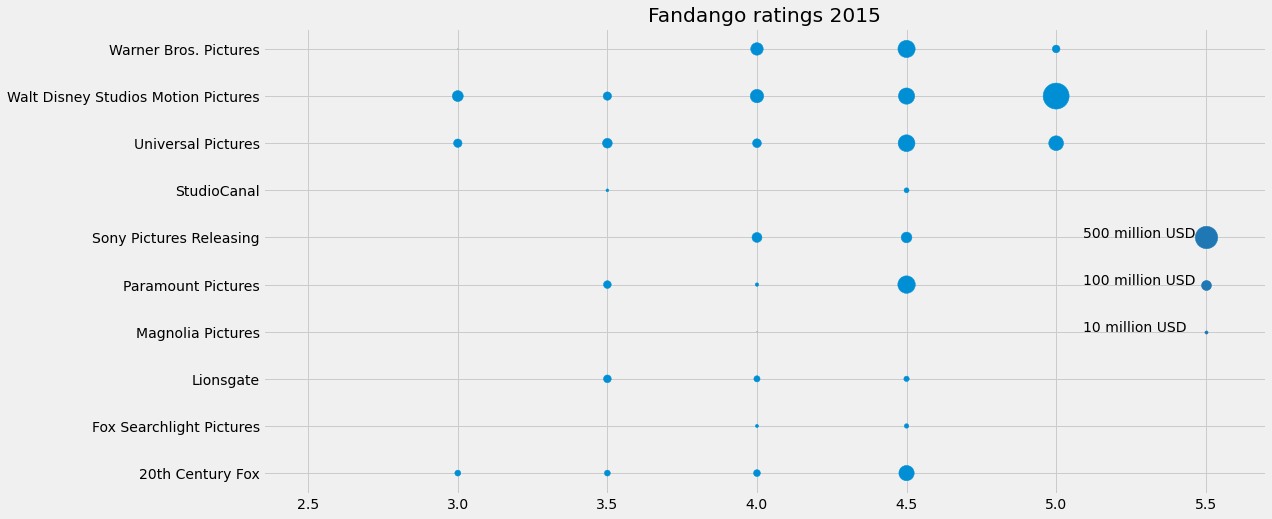

In [312]:
df_counts = f15_topdi.groupby(['distributor', 'Fandango_Stars'])['low_end'].sum().reset_index(name='low_end')
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=df_counts, y='distributor', x='Fandango_Stars', s='low_end')
plt.scatter(x=5.5, y=3, s=10, c='#1f77b4')
plt.scatter(x=5.5, y=4, s=100, c='#1f77b4')
plt.scatter(x=5.5, y=5, s=500, c='#1f77b4')
plt.text(5.09,5, '500 million USD')
plt.text(5.09,4, '100 million USD')
plt.text(5.09,3, '10 million USD')
plt.title('Fandango ratings 2015')
plt.xlim(2.35,5.7)
plt.show()

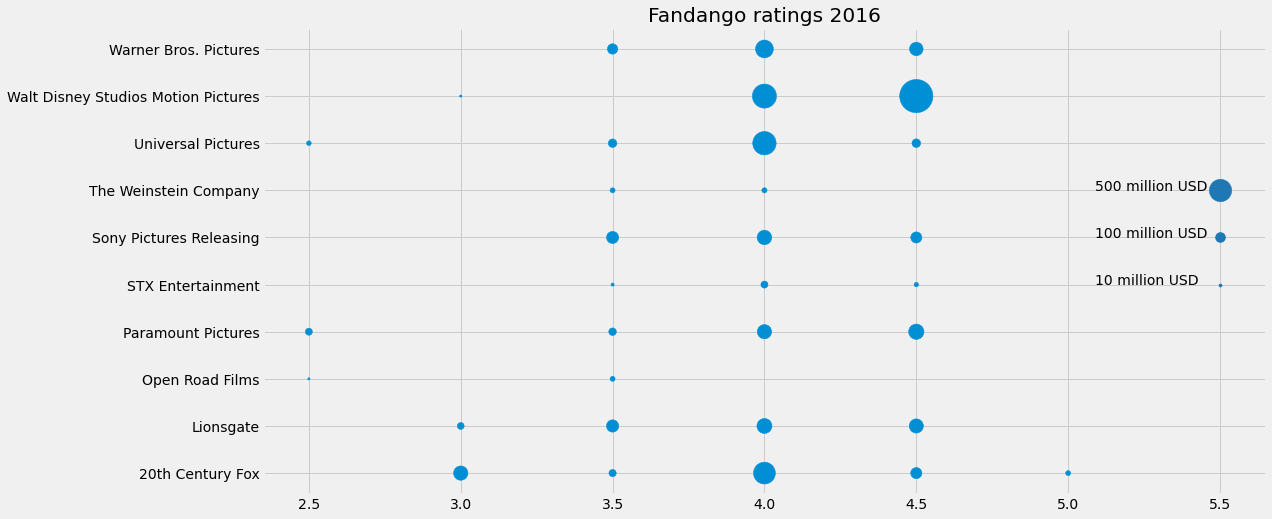

In [313]:
df_counts = m16_topdi.groupby(['distributor', 'fandango'])['low_end'].sum().reset_index(name='low_end')
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=df_counts, y='distributor', x='fandango', s='low_end')
plt.scatter(x=5.5, y=4, s=10, c='#1f77b4')
plt.scatter(x=5.5, y=5, s=100, c='#1f77b4')
plt.scatter(x=5.5, y=6, s=500, c='#1f77b4')
plt.text(5.09,6, '500 million USD')
plt.text(5.09,5, '100 million USD')
plt.text(5.09,4, '10 million USD')
plt.title('Fandango ratings 2016')
plt.show()